Sai Kiran Ale (EBEON1122410684)



 # Project: Heart Attack Prediction

**Abstract :**

Heart plays significant role in living organisms. Diagnosis and prediction of heart related diseases requires more precision, perfection and correctness because a little mistake can cause fatigue problem or death of the person, there are numerous death cases related to heart and their counting is increasing exponentially day by day. To deal with the problem there is essential need of prediction system for awareness about diseases. Machine learning is the branch of Artificial Intelligence(AI), it provides prestigious support in predicting any kind of event which take training from natural events. In this paper, we calculate accuracy of machine learning algorithms for predicting heart disease, for this algorithm is  Logistic Regression by using Kaggle  repository dataset. For implementation of Python programming Anaconda(jupyter) notebook is best tool, which have many type of library, header file, that make the work more accurate and precise.

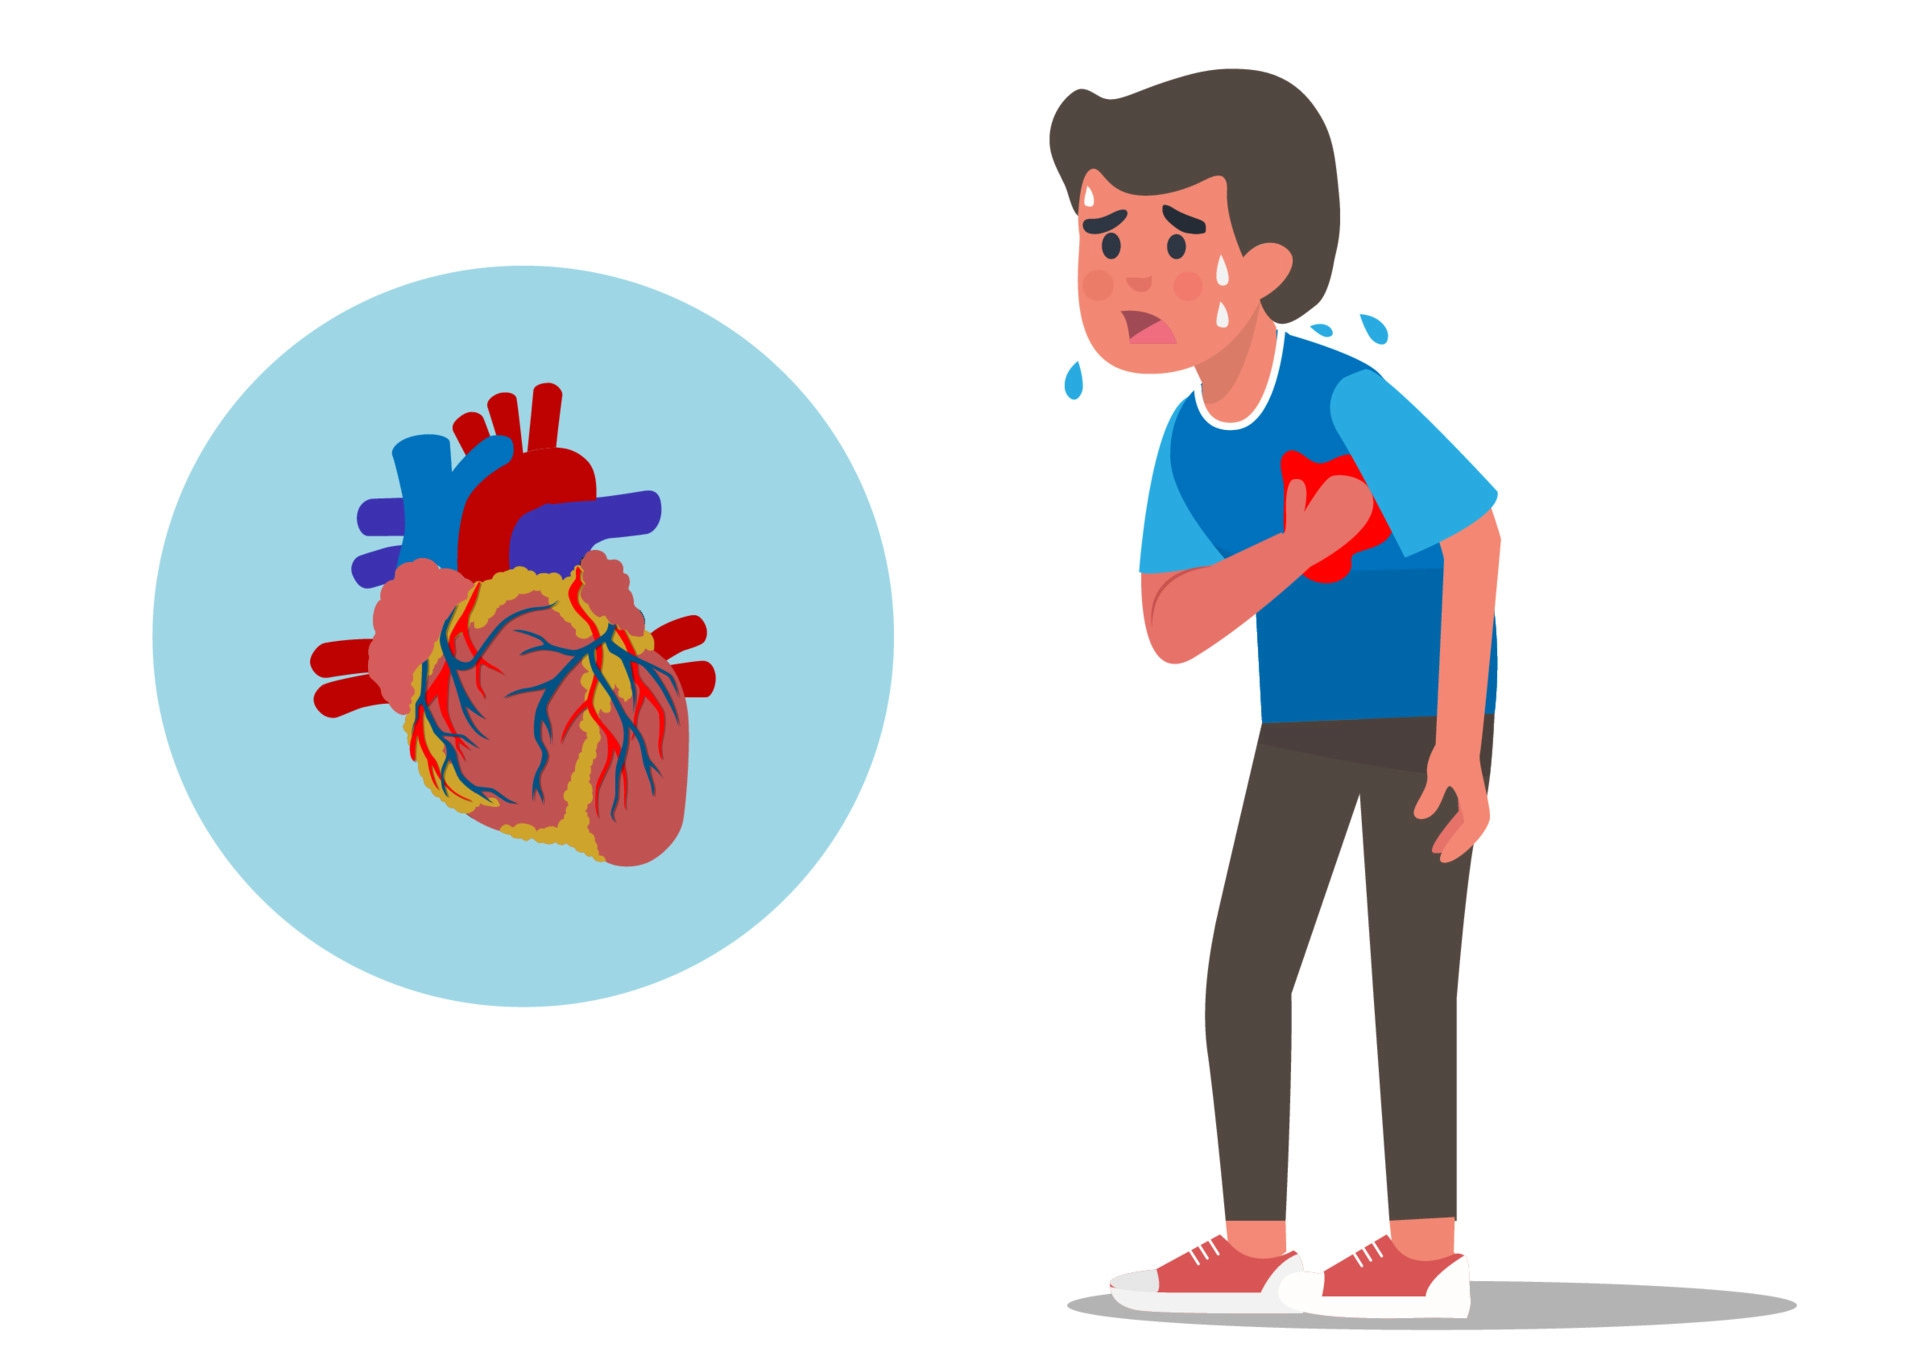

**Introduction**

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):  

1. Age : Age of the patient

2. Sex : Sex of the patient

3. exang: exercise induced angina (1 = yes; 0 = no)

4. ca: number of major vessels (0-3)

5. cp : Chest Pain type chest pain type

    * Value 1: typical angina   

    * Value 2: atypical angina

    * Value 3: non-anginal pain

    * Value 4: asymptomatic

6. trestbps : resting blood pressure (in mm Hg)

7. chol : cholestoral in mg/dl fetched via BMI sensor

8. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

9. rest_ecg : resting electrocardiographic results

  * Value 0: normal

  * Value 1: having ST-T wave abnormality (T wave inversions   
  and/or ST elevation or depression of > 0.05 mV)

  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

10. thalach : maximum heart rate achieved

11. target : 0= less chance of heart attack 1= more chance of heart attack

12. thal : thalassemia( A blood disorder )

13. oldpeak : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

14. slope: the slope of the peak exercise ST segment



Kaggle dataset -
https://www.kaggle.com/datasets/pritsheta/heart-attack?select=Heart+Attack+Data+Set.csv

Importing essential libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 

# Data Wrangling

In [ ]:
#importing dataset
data=pd.read_csv("/content/Heart Attack Data Set.csv")

In [ ]:
#verifying it is a "dataframe"object in pandas
type(data)

pandas.core.frame.DataFrame

In [ ]:
#Shape of Dataset (Number of Rows And Number of Columns)
data.shape

(310, 14)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 310
Number of Columns 14


In [ ]:
#printing out a few columns
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       310 non-null    int64  
 1   sex       310 non-null    int64  
 2   cp        310 non-null    int64  
 3   trestbps  309 non-null    float64
 4   chol      309 non-null    float64
 5   fbs       310 non-null    int64  
 6   restecg   310 non-null    int64  
 7   thalach   309 non-null    float64
 8   exang     310 non-null    int64  
 9   oldpeak   310 non-null    float64
 10  slope     310 non-null    int64  
 11  ca        310 non-null    int64  
 12  thal      310 non-null    int64  
 13  target    310 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.0 KB


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,310.000000,310.000000,310.000000,309.000000,309.000000,310.000000,310.000000,309.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,54.403226,0.683871,0.970968,131.614887,245.728155,0.148387,0.535484,149.436893,0.329032,1.055806,1.390323,0.735484,2.316129,0.532258
std,9.062279,0.465716,1.040815,17.458408,51.670069,0.356058,0.530950,22.861811,0.470621,1.158959,0.617362,1.024473,0.615389,0.499765
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.750000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#Analysing the target variable
data["target"].describe()

count    310.000000
mean       0.532258
std        0.499765
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
data["target"].unique()

array([1, 0])

Clearly, this is a classification problem, with the target variable having values '0' and '1'

# Data Cleaning

Missing values

In [ ]:
# Missing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    1
chol        1
fbs         0
restecg     0
thalach     1
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Dropping missing values
data.dropna(how = "any" , inplace= True)

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate values

In [ ]:
#Checking duplicates
data.duplicated().sum()

5

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

Statisical analysis

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualize correlation

<AxesSubplot:>

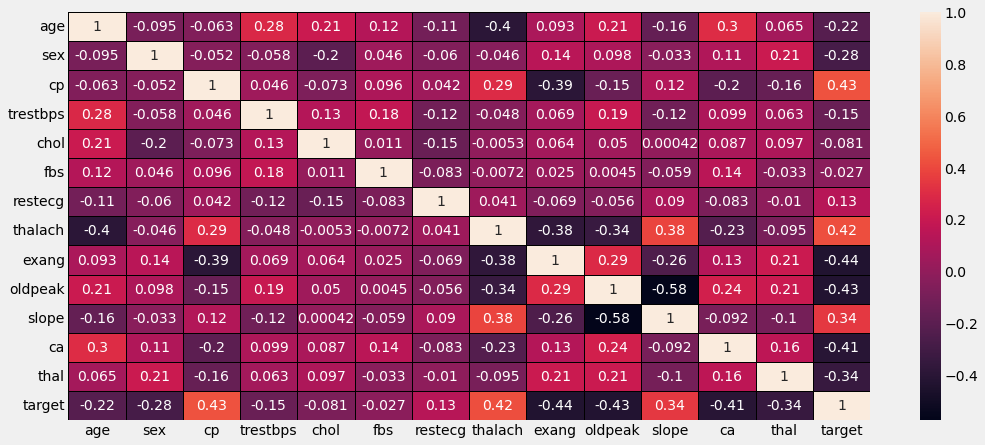

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(data.corr(),annot=True,linewidths=1.0,linecolor='Black')


*  No highly correlated independent features






In [ ]:
for i in (data.columns):
    print("{}: {}".format(i, data[i].value_counts().shape[0]))

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2




*   Categorical Value: sex, cp, fbs, restecg, exang, slope, ca, thalach, target
*  Numerical Value : age, trestbps, chol, thalach, oldpeak


# Univariate analysis

Categorical Feature Analysis

In [ ]:
categorical_cols = ['sex','exng','ca','cp','fbs','restecg','slope','thal']
numerical_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["target"]

Categorical and Target features

In [ ]:
categorical_list = [ "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thalach", "target"]

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

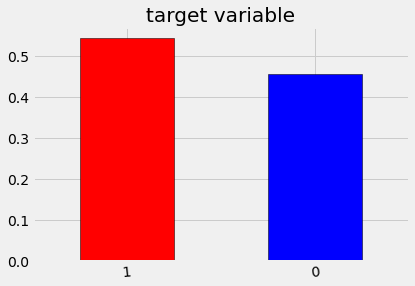

In [ ]:
# target variable
data['target'].value_counts(normalize=True).plot.bar(color=['red','blue'],edgecolor='black',title='target variable')
plt.xticks(rotation=5)



*   Around 55% people have more chances to get heart attack

*  Around 45% people have less chances to get heart attack 





Sex Feature

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

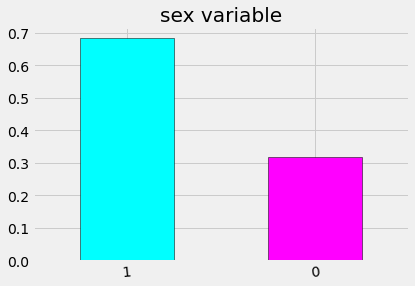

In [ ]:
# sex variable
data['sex'].value_counts(normalize=True).plot.bar(color=['cyan','magenta'],edgecolor='black',title='sex variable')
plt.xticks(rotation=5)

* Around 68 % people are with sex=1
* Around 30 % people are with sex=0

Chest Pain Feature

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '2'), Text(2, 0, '1'), Text(3, 0, '3')])

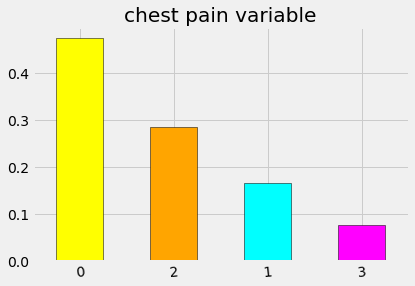

In [ ]:
#cp variable
data['cp'].value_counts(normalize=True).plot.bar(color=['yellow','orange','cyan','magenta'],edgecolor='black',title='chest pain variable')
plt.xticks(rotation=5)

* Around 50 % of the people have chest pain type: Typical Angina
* Around 28 % of the people have chest pain type: Non-anginal Pain
* Around less than 20 % of the people have chest pain type: Atypical Angina
* Around less than 10% of the people have chest pain type: Asymptomatic

================================================================

1. exercise induced angina
2. fasting blood sugar > 120 mg/dl
3. resting electrocardiographic results
4. Slope



<AxesSubplot:title={'center':'- Slope'}>

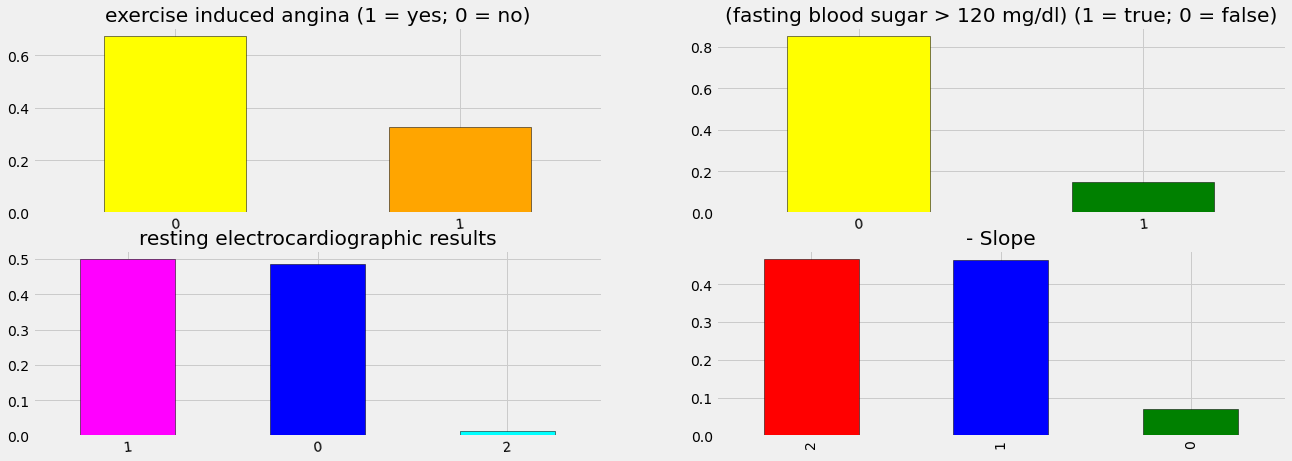

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(221)
data['exang'].value_counts(normalize=True).plot.bar(color=['yellow','orange'],edgecolor='black',title='exercise induced angina (1 = yes; 0 = no)')
plt.xticks(rotation=5)
plt.subplot(222)
data['fbs'].value_counts(normalize=True).plot.bar(color=['yellow','green'],edgecolor='black',title='(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=5)
plt.subplot(223)
data['restecg'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan'],edgecolor='black',title='resting electrocardiographic results')
plt.xticks(rotation=5)
plt.subplot(224)
data['slope'].value_counts(normalize=True).plot.bar(color=['red','blue','green'],edgecolor='black',title='- Slope')

* More than 65 % of the people Exercise don't induced angina
* More than 35 % of the people Exercise induced angina
less than 20 % of the people have fasting blood sugar > 120 mg/dl
* More than 80 % of the people have fasting blood sugar <= 120 mg/dl
* less than 50 % of the people have resting electrocardiographic results normal
* 50 % of the people have resting electrocardiographic results: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* 1% or 2% of the people have resting electrocardiographic results: showing probable or definite left ventricular hypertrophy by Estes' criteria

=============================================================

1. number of major vessels
2. Thalium Stress Test result ~ (0,3)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '1'), Text(3, 0, '0')])

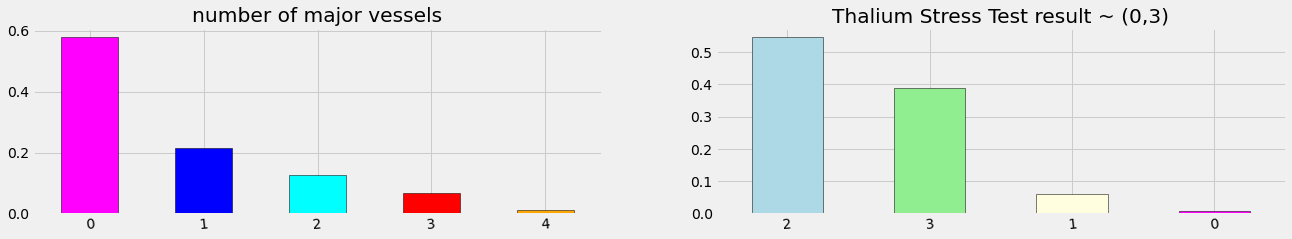

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(221)
data['ca'].value_counts(normalize=True).plot.bar(color=['magenta','blue','cyan','red','orange'],edgecolor='black',title='number of major vessels')
plt.xticks(rotation=5)
plt.subplot(222)
data['thal'].value_counts(normalize=True).plot.bar(color=['lightblue','lightgreen','lightyellow','magenta'],edgecolor='black',title='Thalium Stress Test result ~ (0,3)')
plt.xticks(rotation=5)

# Numerical features

In [ ]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

age , blood pressure , cholestoral , Heart Rate

(array([ 60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

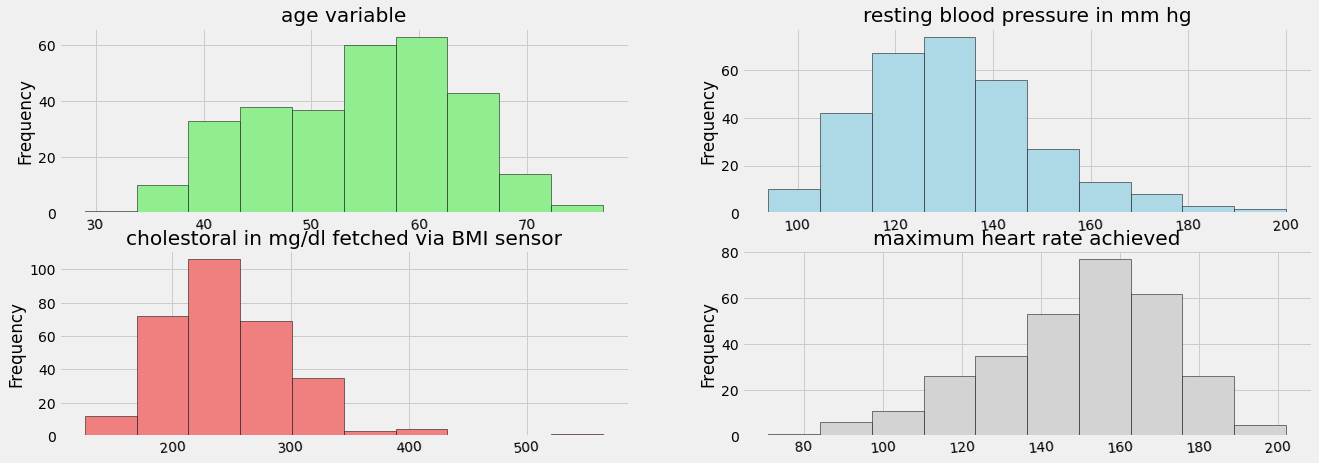

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(221)
data['age'].plot.hist(edgecolor='black',color='lightgreen',title='age variable')
plt.xticks(rotation=5)
plt.subplot(222)
data['trestbps'].plot.hist(edgecolor='black',color='lightblue',title='resting blood pressure in mm hg')
plt.xticks(rotation=5)
plt.subplot(223)
data['chol'].plot.hist(edgecolor='black',color='lightcoral',title='cholestoral in mg/dl fetched via BMI sensor')
plt.xticks(rotation=5)
plt.subplot(224)
data['thalach'].plot.hist(edgecolor='black',color='lightgray',title='maximum heart rate achieved')
plt.xticks(rotation=5)

Oldpeak

<AxesSubplot:title={'center':'oldpeak variable'}, ylabel='Frequency'>

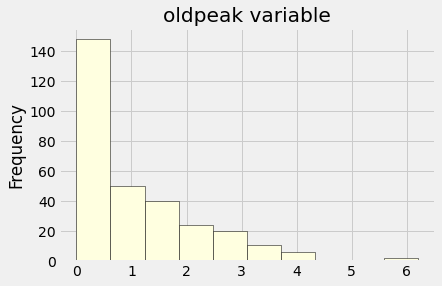

In [ ]:
data['oldpeak'].plot.hist(edgecolor='black',color='lightyellow',title='oldpeak variable')

# Bivariate Analysis

Effect of age on heart attack

<AxesSubplot:title={'center':'effect of age on heart attack'}, xlabel='age', ylabel='target'>

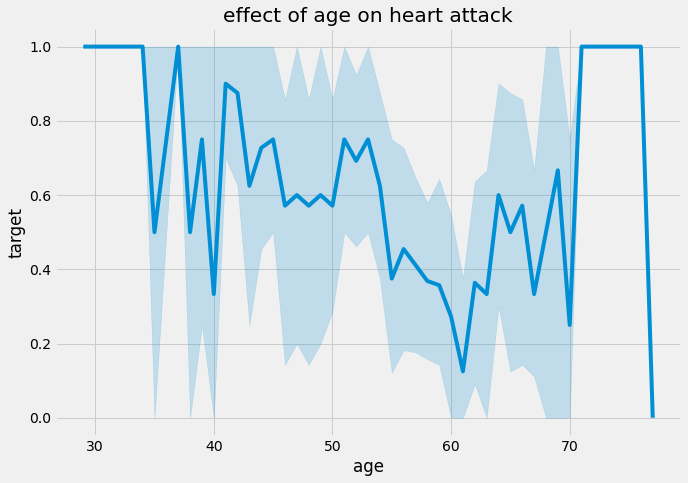

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart attack")
sns.lineplot(x=data['age'],y=data['target'])

* The people with the age 30 to 35 have higher chance of heart attacks

* The people with the age than 70 and less than 75 have higher chance of heart attacks


Heart attack related with sex

<AxesSubplot:xlabel='sex', ylabel='count'>

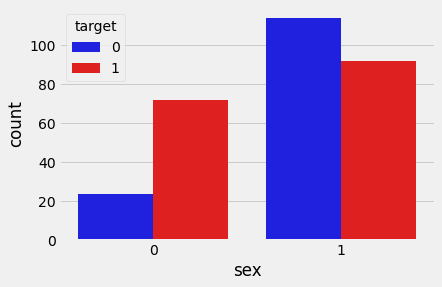

In [ ]:
sns.countplot(data=data,x='sex',palette=["blue","red"], hue='target')

* people of sex=1 have higher chances of getting heart attacks

Heart attack related with chest pain


<AxesSubplot:xlabel='cp', ylabel='Density'>

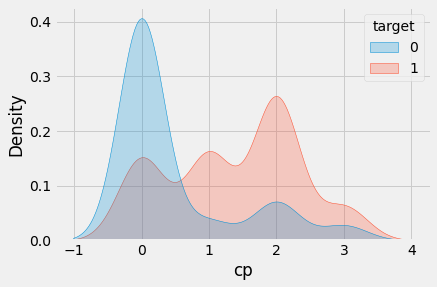

In [ ]:
sns.kdeplot(data=data, x='cp',hue="target", fill=True)

* people with chest pain type=2 have higher chance of getting 
heart attacks

Heart attack related with age

<AxesSubplot:xlabel='age', ylabel='Density'>

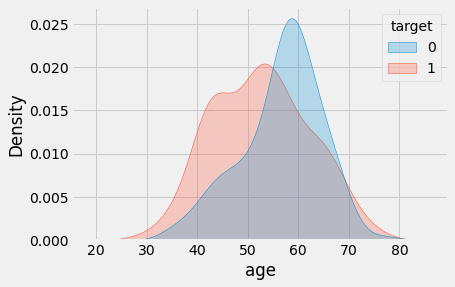

In [ ]:
sns.kdeplot(data=data, x='age',hue="target", fill=True)

* according to the data people with lower age have more chances of getting heart attacks than those of higher ages

Heart attack related with thalium stress test

<AxesSubplot:xlabel='thal', ylabel='Density'>

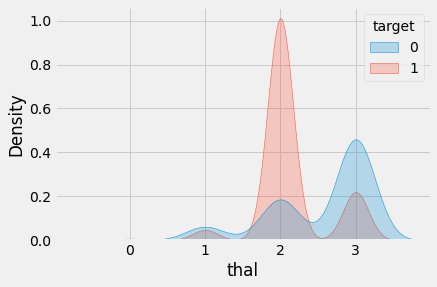

In [ ]:
sns.kdeplot(data=data, x='thal',hue="target", fill=True)

* people with thal test=2 have higher chance of getting heart attacks

Heart attack realted with Exercise induced angina

<AxesSubplot:xlabel='exang', ylabel='Density'>

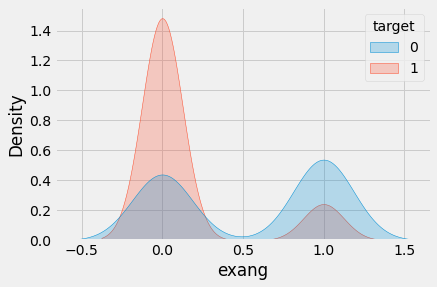

In [ ]:
sns.kdeplot(data=data, x='exang',hue="target", fill=True)

* people with exang=0 have higher chances of getting heart attacks

Effect of age on blood pressure

<AxesSubplot:title={'center':'effect of age on blood pressure'}, xlabel='age', ylabel='trestbps'>

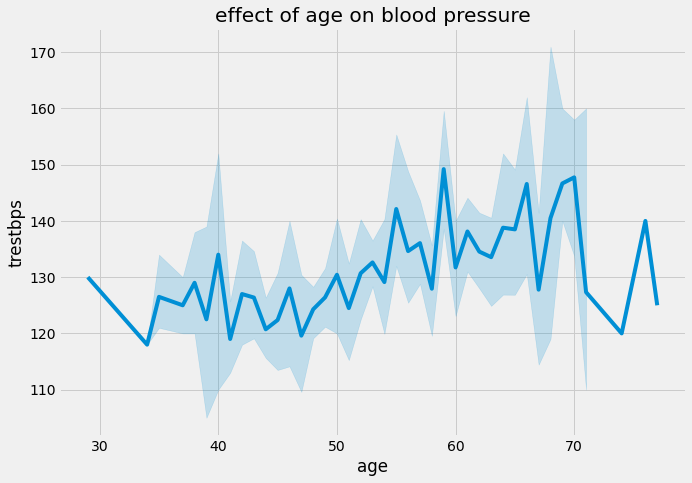

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on blood pressure")
sns.lineplot(x=data['age'],y=data['trestbps'])

* as age is incresing the increase in the blood pressure has been founded

Effect of age on cholestrol level

<AxesSubplot:title={'center':'effect of age on cholestrol level'}, xlabel='age', ylabel='chol'>

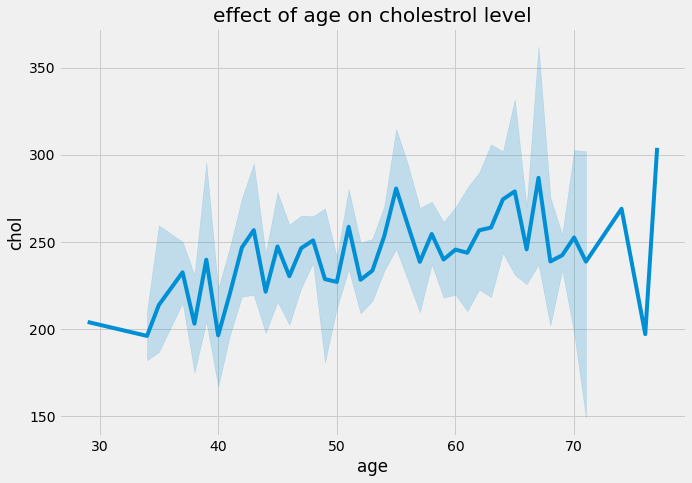

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on cholestrol level")
sns.lineplot(x=data['age'],y=data['chol'])

* as age is incresing the increase in the cholestrol level has been founded

Effect of age on heart rate

<AxesSubplot:title={'center':'effect of age on heart rate'}, xlabel='age', ylabel='thalach'>

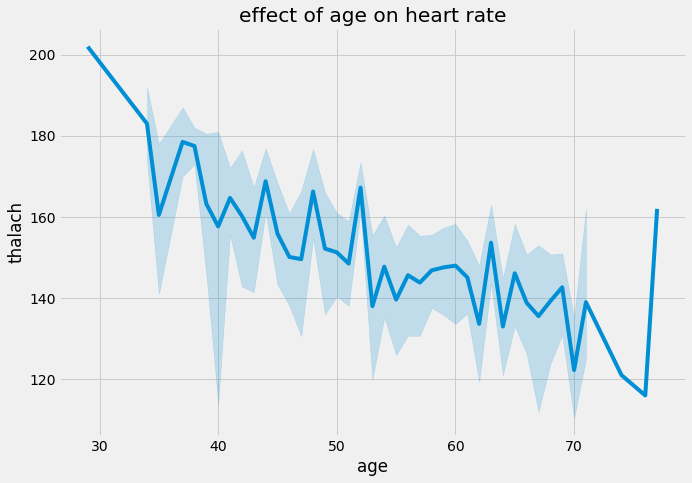

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of age on heart rate")
sns.lineplot(x=data['age'],y=data['thalach'])

* as age is incresing the decrease in the heart rate has been founded

How does increased heart rate and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and heart rate'}, xlabel='age', ylabel='thalach'>

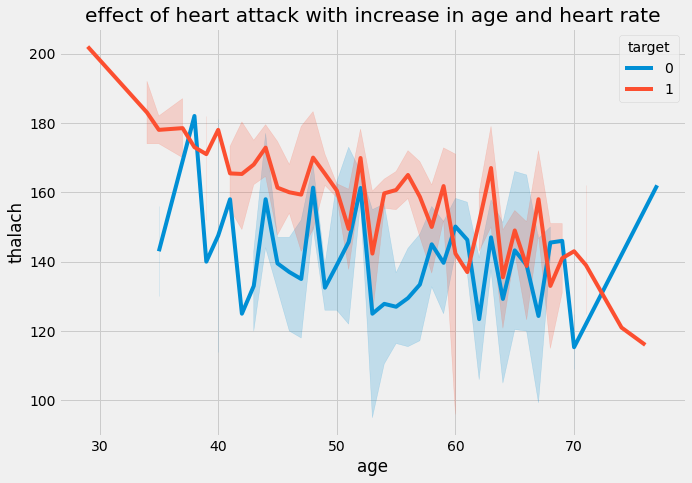

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and heart rate")
sns.lineplot(x=data['age'],y=data['thalach'],hue=data['target'])

* as with the increase in the age the heart rate is decresing and also the people with more chances of heart attacks are decreasing hence we can say higher heart rate increases the chance of heart attack

<AxesSubplot:xlabel='thalach', ylabel='Density'>

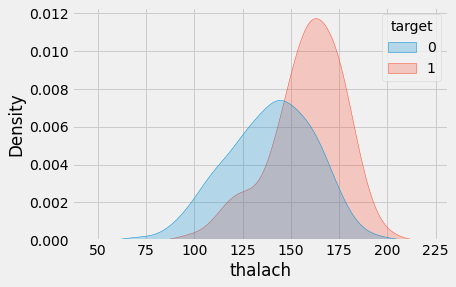

In [ ]:
sns.kdeplot( data=data, x='thalach',hue="target",fill=True)

How does increased cholestrol and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and cholestrol'}, xlabel='age', ylabel='chol'>

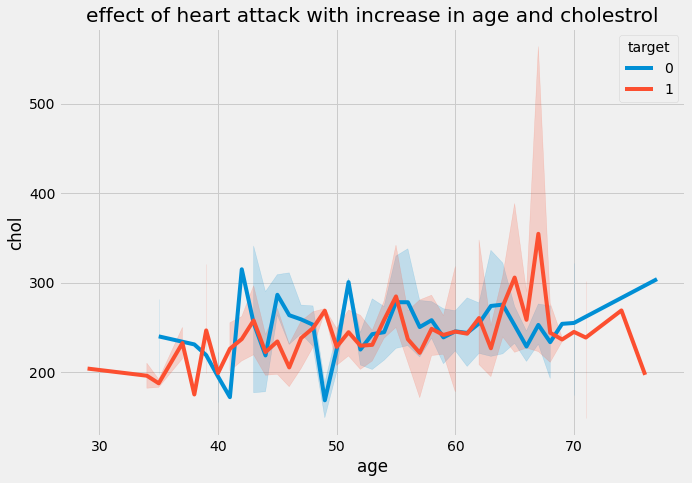

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and cholestrol")
sns.lineplot(x=data['age'],y=data['chol'],hue=data['target'])

* as with the increase in the age the cholestrol level is incresing and also the people with more chances of heart attacks are also increasing hence we can say higher cholestrol level increases the chance of heart attack

<AxesSubplot:xlabel='chol', ylabel='Density'>

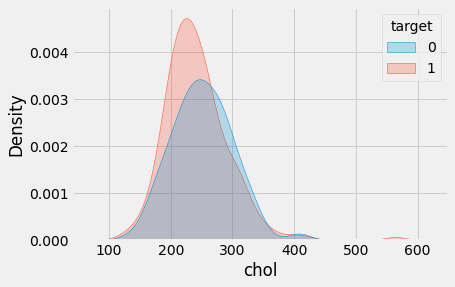

In [ ]:
sns.kdeplot( data=data, x='chol',hue="target",fill=True)

How does increased blood pressure and age affect the heart attack

<AxesSubplot:title={'center':'effect of heart attack with increase in age and blood pressure'}, xlabel='age', ylabel='trestbps'>

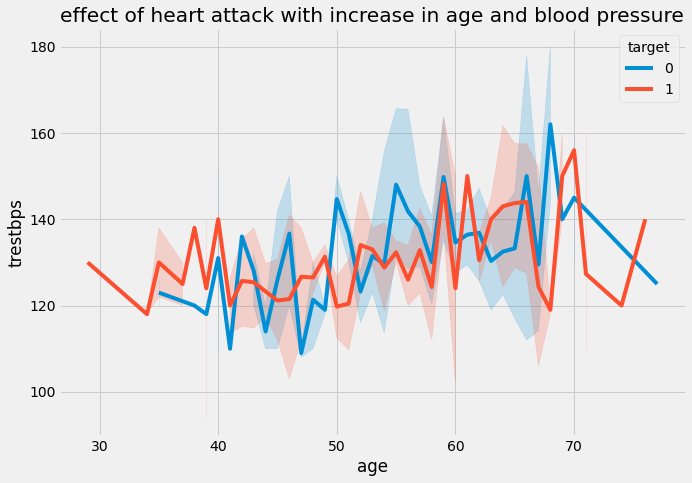

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and blood pressure")
sns.lineplot(x=data['age'],y=data['trestbps'],hue=data['target'])

* as with the increase in the age the blood pressure is incresing and also the people with more chances of heart attacks are also increasing hence we can say blood pressure increases the chance of heart attack

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

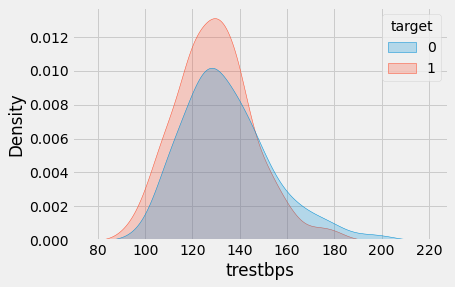

In [ ]:
sns.kdeplot( data=data, x='trestbps',hue="target",fill=True)

## Data Modeling

Encoding Categorical Columns

In [ ]:
#Encoding Categorical Columns
df = data.copy() 

In [ ]:
df = pd.get_dummies(data, columns = categorical_list[:-1], drop_first = True)
df.head()

,age,trestbps,chol,oldpeak,thal,target,sex_1,cp_1,cp_2,cp_3,...,thalach_184.0,thalach_185.0,thalach_186.0,thalach_187.0,thalach_188.0,thalach_190.0,thalach_192.0,thalach_194.0,thalach_195.0,thalach_202.0
0,63,145.0,233.0,2.3,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,37,130.0,250.0,3.5,2,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,41,130.0,204.0,1.4,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,56,120.0,236.0,0.8,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57,120.0,354.0,0.6,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Standard Scaler

Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop(["target"], axis = 1)
y = data["target"]

In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
standard = scaler.fit_transform(X)

In [ ]:
standard

array([[ 0.94979429,  0.68265615,  1.97647049, ..., -2.27118179,
        -0.71491124, -2.1479552 ],
       [-1.92854796,  0.68265615,  1.005911  , ..., -2.27118179,
        -0.71491124, -0.51399432],
       [-1.48572607, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 1.50332164,  0.68265615, -0.93520799, ..., -0.64583368,
         1.27497996,  1.11996657],
       [ 0.28556146,  0.68265615, -0.93520799, ..., -0.64583368,
         0.28003436,  1.11996657],
       [ 0.28556146, -1.46486632,  0.0353515 , ..., -0.64583368,
         0.28003436, -0.51399432]])

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size = 0.2)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (241, 13)
X_test: (61, 13)
y_train: (241,)
y_test: (61,)


## Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
score = model.score(X_train, y_train)
print("Prediction score is:",score)

Prediction score is: 0.8630705394190872


In [ ]:
score = model.score(X_test, y_test)
print("Prediction score is:",score)

Prediction score is: 0.8524590163934426


In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic Regresson model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Logistic Regresson model accuracy score: 0.8525


## Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[16  7]
 [ 2 36]]


16 is the amount of True Positives data, while 36 is True Negatives.

7 & 2 are the number of errors.

There are 7 type 1 error (False Positives)- You predicted positive and it’s false.

There are 2 type 2 error (False Negatives)- You predicted negative and it’s false.

Hence if we calculate the accuracy its # Correct Predicted/ # Total. In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

(TP + TN)/(TP + TN + FP + FN). (16+36)/(16+36+7+2) = 0.85 = 85% accuracy

Note: Above 70% is considered good but,be careful because if your data is extremly high , it may be (overfitting ).Thus,85% is the ideal accuray!

## Predictions

Scenario: 

A patient develops cardiac symptoms & you input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat.

He has no major vessels colored by fluoroscopy, and in addition his maximum heart rate achieved is a reversable defect.

Based on this information, can you classify this patient with Heart Attack?

In [ ]:
print(model.predict(scaler.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


yes.Our machine learning algorithm has classified this patient with Heart Attack.

Predicting the Test set results:

First value represents our predicted value, Second value represents our actual value.

If the values match, then we predicted correctly. We can see that our results are very accurate!

In [ ]:
y_pred = model.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred,y_test)))

[1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 1 0 0]


## Building a Predictive System

In [ ]:
input_data = (37,1,2,130,250,0,1,187,0,3.0,0,2,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Attack')
else:
  print('The Person has Heart Attack')

[1]
The Person has Heart Attack


# Conclusion

* Our Logistic Regression algorithm yields the highest accuracy, 85%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 85% is the ideal accuracy!

* Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

* Our machine learning algorithm can now classify patients with Heart Attack. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse sypmtoms from arising later.